<h1 align='center'>Compreendendo os dados via redução de dimensionalidade</h1>

<p align='center'><img src=https://hidden.brutalk.com/wp-content/uploads/2021/02/Introduccion-a-la-reduccion-de-dimensionalidad-para-el-aprendizaje-automatico.jpg   width="400" height="300"></p>

<p align='justify'>Vamos conversar sobre três técnicas fundamentais que o ajudarão a resumir o conteúdo de informações de um conjunto de dados, transformando-o em um novo subespaço de características de menor dimensionalidade do que o original. A compactação de dados é um tópico importante no aprendizado de máquina e nos ajuda a armazenar e analisar as quantidades crescentes de dados que são produzidos e coletados na era moderna da tecnologia.</p>

<h3>Redução de dimensionalidade não supervisionada por meio da Análise dos Componentes Principais(PCA)</h3>

<p align='justify'>Semelhante à seleção de recursos, podemos usar diferentes técnicas de extração de recursos para reduzir o número de recursos em um conjunto de dados. A diferença entre a seleção de recursos e a extração de recursos é que, enquanto mantemos os recursos originais quando usamos algoritmos de seleção de recursos, como <b>seleção regressiva sequencial</b>, usamos a extração de recursos para transformar ou projetar os dados em um novo espaço de recursos.</p>

<p align='justify'>No contexto da redução de dimensionalidade, a extração de características pode ser entendida como uma abordagem de compressão de dados com o <u>objetivo de manter a maior parte das informações relevantes</u>. Na prática, a extração de recursos não é usada apenas para melhorar o espaço de armazenamento ou a eficiência computacional do algoritmo de aprendizado, mas também pode melhorar o desempenho preditivo reduzindo a <u>maldição da dimensionalidade</u> - especialmente se estivermos trabalhando com modelos não regularizados.</p>


<h4>Extraindo os componentes principais passo a passo</h4>
<p align='justify'>Nesta subseção, abordaremos as quatro primeiras etapas de um PCA:</p>
<ol>
<li>Padronização dos dados.</li>
<li>Construindo a matriz de covariância.</li>
<li>Obtenção dos autovalores e autovetores da matriz de covariâncias.</li>
<li>Classificando os autovalores por ordem decrescente para classificar os autovetores.</li>
</ol>

In [52]:
# Carregando o conjunto de dados WINE
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                        header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [53]:
# Dividindo o conjunto de dados em 70/30 
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

# 1º PASSO:  Padronizando os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [54]:
# 2º PASSO: Criando uma Matriz de Convariância
import numpy as np
cov_mat = np.cov(X_train_std.T)

# 3º PASSO: Obtendo os autovalores e autovetores da matriz de covariância
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nAutovalores \n%s' %eigen_vals)
print('\nAutovetores \n%s' %eigen_vecs)


Autovalores 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

Autovetores 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
   2.90625226e-01 -2.99096847e-01 -7.90529293e-02  3.68176414e-01
   3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
  -8.95378697e-02 -6.27036396e-01  2.74002014e-01  1.25775752e-02
  -1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
   1.60834991e-01 -3.89128239e-04 -1.32328045e-01 -1.77578177e-01
  -3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
  -5.15873402e-02  4.05836452e-02 -2.23999097e-01  4.40592110e-01
   2.43373853e-01 -1.30485780e-01 -4.189539

<blockquote>
<h4>Autodecomposição no NumPy</h4>
<p align='justify'>A função <i>numpy.linalg.eig</i> foi projetada para operar em matrizes quadradas simétricas e não simétricas. No entanto, você pode descobrir que ela retorna autovalores complexos em certos casos.</p>
<p align='justify'>Uma função relacionada, <i>numpy.linalg.eigh</i>, tem sido implementada para decompor matrizes hermetianas, que é uma abordagem numericamente mais estável para trabalhar com matrizes simétricas, como a matriz de covariância; <i>numpy.linalg.eigh</i> sempre retorna autovalores reais.</p>
</blockquote>

<h3>Variação total e explicada</h3>
<p align='justify'>Como queremos reduzir a dimensionalidade de nosso conjunto de dados compactando-o em um novo subespaço de recursos, selecionamos apenas o subconjunto dos autovetores (componentes principais) que contém a maioria das informações (variância). Os autovalores definem a magnitude dos autovetores, então temos que ordenar os autovalores por magnitude decrescente; estamos interessados nos principais <i>k</i> autovetores com base nos valores de seus autovalores correspondentes.</p>
<p align='justify'>Mas antes de coletar esses <i>k</i> autovetores mais informativos, vamos traçar as razões explicadas de variância dos autovalores. A razão explicada pela variância de um autovalor, 𝜆𝑗 , é simplesmente a fração de um autovalor, 𝜆𝑗, e a soma total dos autovalores:</p>

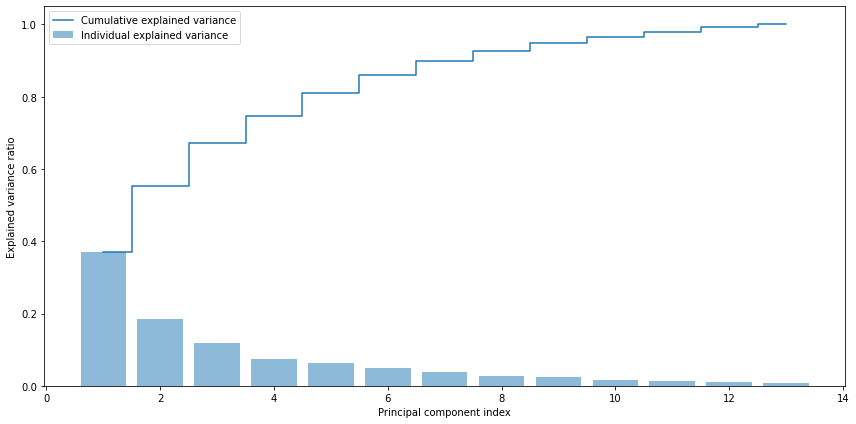

In [55]:
import matplotlib.pyplot as plt

tot = sum(eigen_vals)

# 4º PASSO: Classificando os autovalores em ordem decrecente
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Classificando os Autovetores
plt.figure(figsize=(12,6))
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<p align='justify'>O gráfico resultante indica que o primeiro componente principal sozinho é responsável por aproximadamente <b>40% da variação</b>. Além disso, podemos ver que os dois primeiros componentes principais combinados explicam quase <b>60% da variação no conjunto de dados</b>.</p>

<p align='justify'>Embora o gráfico de variância explicado nos lembre dos valores de importância de recursos que computamos, devemos nos lembrar que o <i>PCA</i> é um método não supervisionado, o que significa que as informações sobre os rótulos de classe é <u>ignorada</u>. Enquanto uma floresta aleatória usa as informações de associação de classe para calcular as impurezas do nó, a variância mede a dispersão dos valores ao longo de um eixo de recurso.</p>

<h3>Transformação de recursos</h3>
<p align='justify'>Agora que decompusemos com sucesso a matriz de covariância em pares próprios, vamos prosseguir com as três últimas etapas para transformar o conjunto de dados <i>Wine</i> nos novos eixos de componentes principais. As etapas restantes que vamos abordar nesta seção são as seguintes:</p>
<li>Selecionar os <i>k</i> autovetores, que correspondem aos <i>k</i> maiores autovalores, onde <i>k</i> é a dimensionalidade do novo subespaço de recurso (𝑘 ≤ 𝑑).</li>
<li>Construir uma matriz de projeção, <i>W</i>, a partir dos <i>k</i> autovetores "superiores".</li>
<li>Transformar o conjunto de dados de entrada <i>d-dimensional</i>, <i>X</i>, usando a matriz de projeção, <i>W</i>, para obter o novo subespaço de recurso <i>k-dimensional</i>.</li>

In [56]:
# Começamos ordenando os pares próprios por ordem decrescente dos valores próprios
# Faça uma lista de tuplas (autovalores, autovetores)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Ordene as tuplas (eigenvalue, eigenvector) tuples do maior para o menor
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

<p align='justify'>Em seguida, coletamos os dois autovetores que correspondem aos dois maiores autovalores, para capturar cerca de <u>60% da variância</u> neste conjunto de dados. Observe que dois autovetores foram escolhidos para fins de ilustração, pois vamos plotar os dados por meio de um gráfico de dispersão bidimensional mais adiante. Na prática, o número de componentes principais deve ser determinado por uma compensação entre a <b>eficiência computacional</b> e o <b>desempenho do classificador</b>:

In [57]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


<p alifn='justify'>Executando o código anterior, criamos uma matriz de projeção de 13 × 2 dimensões, <i>W</i>, a partir dos dois autovetores superiores. Usando a matriz de projeção, podemos agora transformar um exemplo, <i>x</i> (representado como um vetor linha de 13 dimensões), no subespaço <i>PCA</i> (os componentes principais um e dois) obtendo 𝒙′, agora um vetor de exemplo bidimensional consistindo em duas novas características:</p>

In [58]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

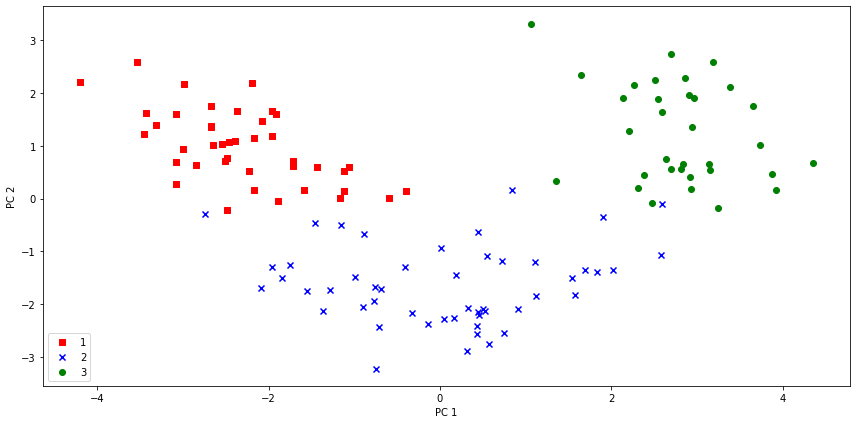

In [59]:
# Vamos treinar todo o conjunto 124 x 13 do conjunto de treinamento em dois Componentes Principais
X_train_pca = X_train_std.dot(w)

# Visualizando os dados em duas dimensões em um gráfico Scatter
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
plt.figure(figsize=(12,6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


<p align='justify'>Como podemos ver no gráfico resultante, os dados estão mais espalhados ao longo do eixo x - o primeiro componente principal - do que o segundo componente principal (eixo y), o que é consistente com o gráfico de razão de variância explicado que criamos no subseção anterior. No entanto, podemos dizer que um <b>classificador linear</b> provavelmente será capaz de separar bem as classes.</p>

<p align='justify'>Embora tenhamos codificado as informações de rótulo de classe para fins de ilustração no gráfico de dispersão anterior, devemos ter em mente que o <i>PCA</i> é uma técnica não supervisionada que não usa nenhuma informação de rótulo de classe.</p>

<h3>Análise dos componentes principais no <i>scikit-learn</i></h3>

<p align='justify'>Embora a abordagem detalhada na subseção anterior tenha nos ajudado a seguir o funcionamento interno do <i>PCA</i>, agora discutiremos como usar a classe <i>PCA</i> implementada no <i>scikit-learn</i>.</p>

<p align='justify'>A classe <i>PCA</i> é outra das classes de transformadores do <i>scikit-learn</i>, onde primeiro ajustamos o modelo usando os dados de treinamento antes de transformar os dados de treinamento e o conjunto de dados de teste usando os mesmos parâmetros do modelo. Agora, vamos usar a classe <i>PCA</i> do <i>scikit-learn</i> no conjunto de dados de treinamento <i>Wine</i>, classificar os exemplos transformados por meio de regressão logística e visualizar as regiões de decisão por meio da função <i>plot_decision_regions</i>.</p>

In [60]:
from sklearn.decomposition import PCA

pca = PCA() # Instanciando o PCA tranformer
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

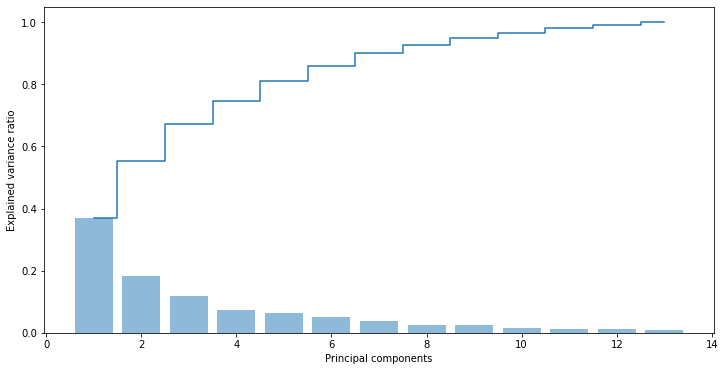

In [61]:
# Plotando as Variáveis "Razão de Variância Explicada e os Componentes Principais"
plt.figure(figsize=(12,6))
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

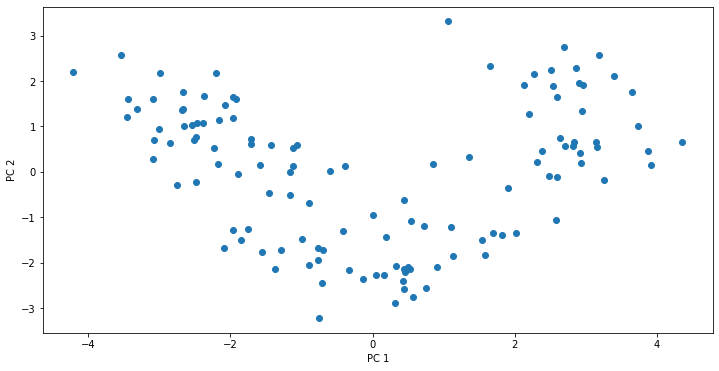

In [69]:
# Instanciando o PCA com 2 (dois) componentes apenas. Reduzindo a dimensionalidade.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.figure(figsize=(12,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression

# Ajustando o modelo em um conjunto de dados reduzido (train_pca)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

In [64]:
# Função Região de Decisão
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

<p align='justify'>Ao executar o código, veremos as regiões de decisão para os dados de treinamento reduzidas a dois eixos de componentes principais (n_components=2):</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_10420\3564363118.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


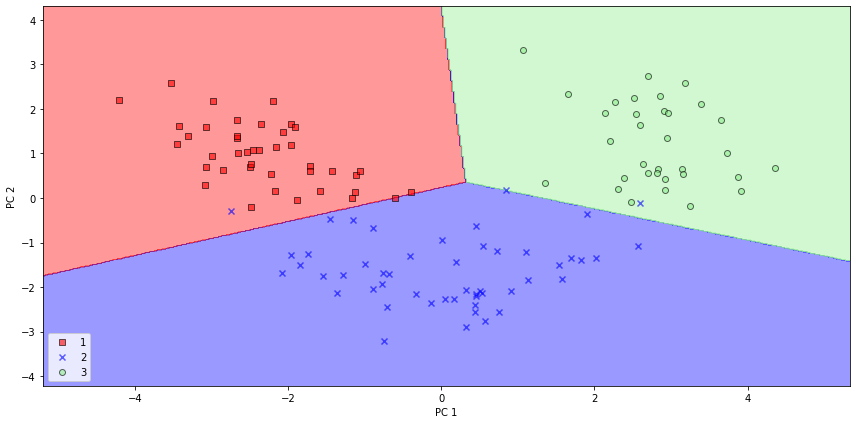

In [72]:
# Plotando os Gráficos dos eixos (PCA 1 - PCA 2) do conjunto de treinamento
plt.figure(figsize=(12,6))
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

<p align='justify'>Quando comparamos projeções de <i>PCA</i> via <i>scikit-learn</i> com nossa própria implementação de <i>PCA</i>, pode acontecer que os gráficos resultantes sejam imagens espelhadas um do outro. Observe que isso não se deve a um erro em nenhuma dessas duas implementações; a razão para esta diferença é que, dependendo do auto-solver, os autovetores podem ter sinais negativos ou positivos.</p>
<p align='justify'>Não que isso importe, mas poderíamos simplesmente reverter a imagem espelhada multiplicando os dados por –1 se quiséssemos; observe que os autovetores são normalmente dimensionados para o comprimento de unidade 1. Vamos plotar as regiões de decisão da regressão logística no conjunto de dados de teste transformado para ver se ele pode separar bem as classes.</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_10420\3564363118.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


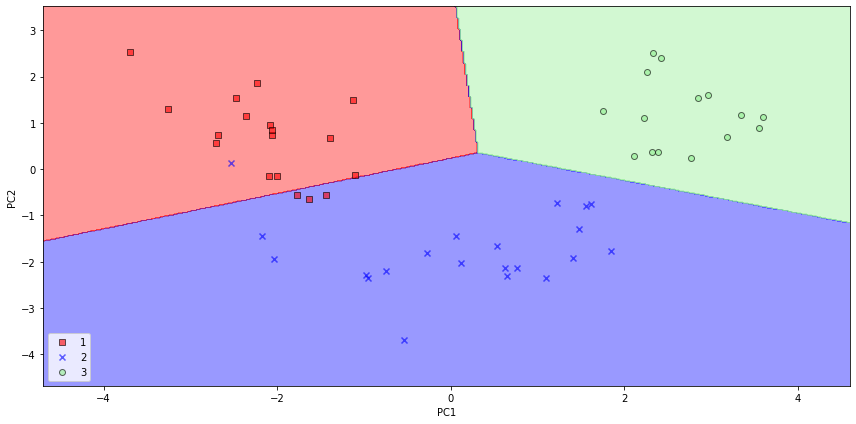

In [68]:
plt.figure(figsize=(12,6))
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

<p align='justify'>Depois de plotarmos as regiões de decisão para o conjunto de dados de teste executando o código anterior, podemos ver que a regressão logística funciona muito bem nesse pequeno subespaço de recursos bidimensionais e apenas classifica incorretamente alguns exemplos no conjunto de dados de teste.</p>

<p align='justify'>Se estivermos interessados nas razões de variância explicadas (<i>explained variance ratio</i>) dos diferentes componentes principais, podemos simplesmente inicializar a classe <i>PCA</i> com o parâmetro <i>n_components</i> definido como <i>None</i>, para que todos os componentes principais sejam mantidos e a razão de variância explicada possa ser acessada através do atributo <i>explain_variance_ratio_</i>.

In [73]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

<p align='justify'>Observe que definimos <i>n_components=None</i> quando inicializamos a classe <i>PCA</i> para que ela retorne todos os componentes principais em uma ordem de classificação, em vez de realizar uma redução de dimensionalidade.</p>

<h4>Compreendendo dados supervisionados por meio de Análise Discriminante Linear (<i>LDA</i>)</h4>

<p align='justify'>A <i>LDA</i> pode ser usado como uma técnica de extração de características para aumentar a eficiência computacional e reduzir o grau de <i>overfitting</i> devido à <u>maldição da dimensionalidade</u> em modelos não regularizados. O conceito geral por trás do <i>LDA</i> é muito semelhante ao <i>PCA</i>, mas enquanto o <i>PCA</i> tenta encontrar os eixos de componentes ortogonais de variância máxima em um conjunto de dados, o objetivo no <i>LDA</i> é encontrar o subespaço de recursos que otimiza a separabilidade de classes. Discutiremos as semelhanças entre <i>LDA</i> e <i>PCA</i> com mais detalhes e percorreremos a abordagem <i>LDA</i> passo a passo.

<h4>Análise de componentes principais versus análise discriminante linear</h4>